In [22]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [23]:
#Importing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#Reading the data

bike = pd.read_csv("day.csv")
bike.head(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   
5        6  06-01-2018       1   0     1        0        6           0   
6        7  07-01-2018       1   0     1        0        0           0   
7        8  08-01-2018       1   0     1        0        1           1   
8        9  09-01-2018       1   0     1        0        2           1   
9       10  10-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   
5           1   8.378268  11.66045  51.8261   6.000868      88        1518   
6           2   8.057402  10.44195  49.8696  11.304642     148        1362   
7           2   6.765000   8.11270  53.5833  17.875868      68         891   
8           1   5.671653   5.80875  43.4167  24.250650      54         768   
9           1   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

#### Understanding the dataset

In [25]:
#Checking shape 

bike.shape

(730, 16)

In [26]:
#Checking info

bike.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null/missing values in the dataset. Let's check the dataset more.

In [27]:
#Statistical summary

bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [28]:
#Dropping the dteday column as we already have yr and month column

bike = bike.drop("dteday",axis=1)
bike.head()

instant  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0        1       1   0     1        0        1           1           2   
1        2       1   0     1        0        2           1           2   
2        3       1   0     1        0        3           1           1   
3        4       1   0     1        0        4           1           1   
4        5       1   0     1        0        5           1           1   

        temp     atemp      hum  windspeed  casual  registered   cnt  
0  14.110847  18.18125  80.5833  10.749882     331         654   985  
1  14.902598  17.68695  69.6087  16.652113     131         670   801  
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [29]:
#Checking the unique records for each variable

bike.nunique(axis=0)

instant       730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

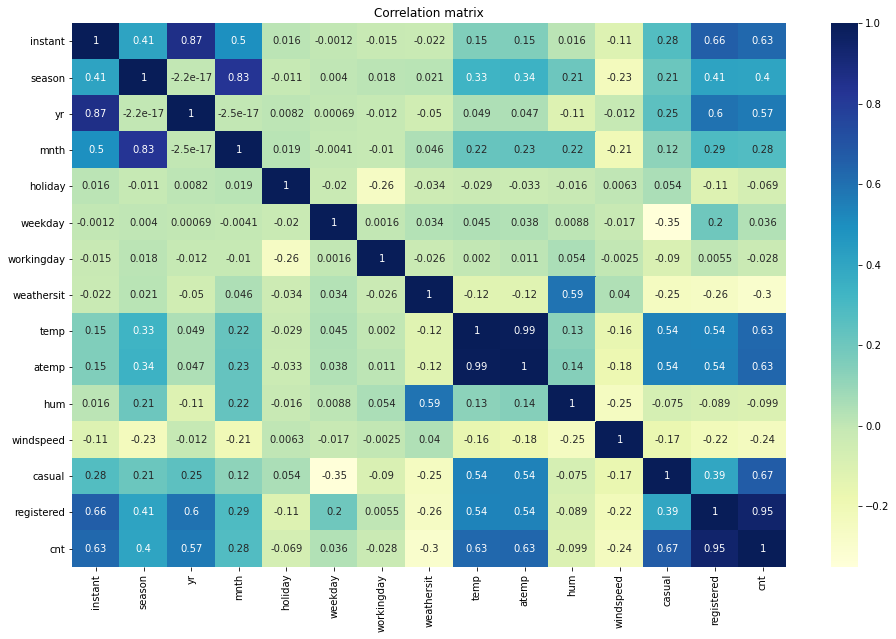

In [30]:
#Checking the correlations with seaborn

fig = plt.figure(figsize=[16,10])
sns.heatmap(data = bike.corr() , annot=True, cmap="YlGnBu" )
plt.title("Correlation matrix")
plt.show()

In [31]:
#Dropping the instant column as well as there is no use of that

bike = bike.drop("instant", axis=1)

In [32]:
#Dropping the columns casual and registered as they are highly correlated with total count and are redundant

bike = bike.drop(["casual","registered"],axis=1)

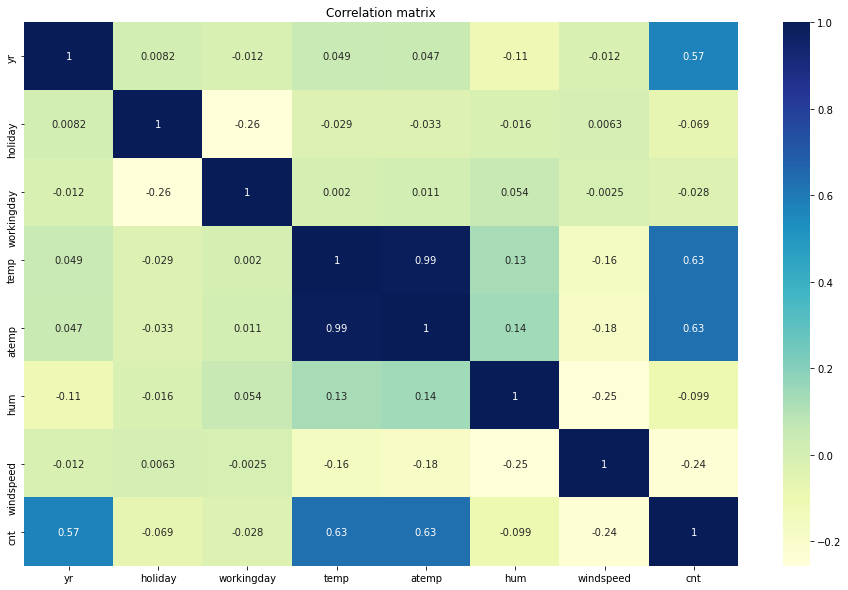

In [112]:
#Checking the correlations with seaborn

fig = plt.figure(figsize=[16,10])
sns.heatmap(data = bike.corr() , annot=True, cmap="YlGnBu" )
plt.title("Correlation matrix")
plt.show()

#### There are few categorical features present which are given as integer type. We will change them to categorical feature first

In [33]:
#Changing datatypes 

bike["season"] = bike["season"].astype(object)
bike["mnth"] = bike["mnth"].astype(object)
bike["holiday"] = bike["holiday"].astype(object)
bike["weekday"] = bike["weekday"].astype(object)
bike["workingday"] = bike["workingday"].astype(object)
bike["weathersit"] = bike["weathersit"].astype(object)

In [34]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


##### For categorical variables with multiple levels, creating dummy features (one-hot encoded).

In [35]:
dummy1 = pd.get_dummies(bike[["season","mnth","weekday","weathersit"]],drop_first=True)

dummy1.head()

season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
0         0         0         0       0       0       0       0       0   
1         0         0         0       0       0       0       0       0   
2         0         0         0       0       0       0       0       0   
3         0         0         0       0       0       0       0       0   
4         0         0         0       0       0       0       0       0   

   mnth_7  mnth_8  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0       0       0  ...        0        0          1          0          0   
1       0       0  ...        0        0          0          1          0   
2       0       0  ...        0        0          0          0          1   
3       0       0  ...        0        0          0          0          0   
4       0       0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 22 columns]

In [36]:
dummy1.columns

Index(['season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [37]:
#Dropping weekday_1 column as it is redundant

dummy1 = dummy1.drop("weekday_1",axis=1)

dummy1.head()

season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
0         0         0         0       0       0       0       0       0   
1         0         0         0       0       0       0       0       0   
2         0         0         0       0       0       0       0       0   
3         0         0         0       0       0       0       0       0   
4         0         0         0       0       0       0       0       0   

   mnth_7  mnth_8  ...  mnth_10  mnth_11  mnth_12  weekday_2  weekday_3  \
0       0       0  ...        0        0        0          0          0   
1       0       0  ...        0        0        0          1          0   
2       0       0  ...        0        0        0          0          1   
3       0       0  ...        0        0        0          0          0   
4       0       0  ...        0        0        0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 21 columns]

In [41]:
#Concatenating dummy1 with the main dataframe

bike_new = pd.concat([bike,dummy1],axis=1)
bike_new.head()

season yr mnth holiday weekday workingday weathersit       temp     atemp  \
0      1  0    1       0       1          1          2  14.110847  18.18125   
1      1  0    1       0       2          1          2  14.902598  17.68695   
2      1  0    1       0       3          1          1   8.050924   9.47025   
3      1  0    1       0       4          1          1   8.200000  10.60610   
4      1  0    1       0       5          1          1   9.305237  11.46350   

       hum  ...  mnth_10  mnth_11  mnth_12  weekday_2  weekday_3  weekday_4  \
0  80.5833  ...        0        0        0          0          0          0   
1  69.6087  ...        0        0        0          1          0          0   
2  43.7273  ...        0        0        0          0          1          0   
3  59.0435  ...        0        0        0          0          0          1   
4  43.6957  ...        0        0        0          0          0          0   

   weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0             1             0  
1          0          0             1             0  
2          0          0             0             0  
3          0          0             0             0  
4          1          0             0             0  

[5 rows x 33 columns]

In [ ]:
#Dropping the original columns which are present as dummies

bike_new = bike_new.drop(["season","mnth","weekday","weathersit"],axis=1)

In [46]:
bike_new.head()

yr holiday workingday       temp     atemp      hum  windspeed   cnt  \
0  0       0          1  14.110847  18.18125  80.5833  10.749882   985   
1  0       0          1  14.902598  17.68695  69.6087  16.652113   801   
2  0       0          1   8.050924   9.47025  43.7273  16.636703  1349   
3  0       0          1   8.200000  10.60610  59.0435  10.739832  1562   
4  0       0          1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_10  mnth_11  mnth_12  weekday_2  weekday_3  \
0         0         0  ...        0        0        0          0          0   
1         0         0  ...        0        0        0          1          0   
2         0         0  ...        0        0        0          0          1   
3         0         0  ...        0        0        0          0          0   
4         0         0  ...        0        0        0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 29 columns]

In [54]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int32  
 1   holiday       730 non-null    int32  
 2   workingday    730 non-null    int32  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [53]:
bike_new["yr"] = bike_new["yr"].astype(int)
bike_new["holiday"] = bike_new["holiday"].astype(int)
bike_new["workingday"] = bike_new["workingday"].astype(int)

### Rescaling the variables

In [55]:
#Importing important packages and rescaling

from sklearn.preprocessing import MinMaxScaler

In [56]:
#creating an object for MinMaxScaler()

scaler = MinMaxScaler()

In [58]:
#Checking the statistics

bike_new.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.690411   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.462641    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
90%      1.000000    0.000000    1.000000   29.998347   33.908210   81.762500   
95%      1.000000    0.000000    1.000000   31.520460   35.749975   86.868735   
99%      1.000000    1.000000    1.000000   33.868050   38.941650   92.795857   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    season_2    season_3  ...     mnth_10  \
count  730.000000   730.000000  730.000000  730.000000  ...  730.000000   
mean    12.763620  4508.006849    0.252055    0.257534  ...    0.084932   
std      5.195841  1936.011647    0.434490    0.437576  ...    0.278971   
min      1.500244    22.000000    0.000000    0.000000  ...    0.000000   
25%      9.041650  3169.750000    0.000000    0.000000  ...    0.000000   
50%     12.125325  4548.500000    0.000000    0.000000  ...    0.000000   
75%     15.625589  5966.000000    1.000000    1.000000  ...    0.000000   
90%     19.833997  7293.800000    1.000000    1.000000  ...    0.000000   
95%     22.999988  7576.400000    1.000000    1.000000  ...    1.000000   
99%     27.380948  8163.810000    1.000000    1.000000  ...    1.000000   
max     34.000021  8714.000000    1.000000    1.000000  ...    1.000000   

          mnth_11     mnth_12   weekday_2   weekday_3   weekday_4   weekday_5  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.082192    0.084932    0.143836    0.142466    0.142466    0.142466   
std      0.274845    0.278971    0.351164    0.349767    0.349767    0.349767   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
90%      0.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
95%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
99%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  730.000000    730.000000    730.000000  
mean     0.142466      0.336986      0.028767  
std      0.349767      0.473004      0.167266  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
90%      1.000000      1.000000      0.000000  
95%      1.000000      1.000000      0.000000  
99%      1.000000      1.000000      1.000000  
max      1.000000      1.000000      1.000000  

[11 rows x 29 columns]

So after all these we can conclude that the dataset is now preprocessed. There are neither any missing values nor outliers. Now we can go for scaling the variables.

In [59]:
#Let's scale the numeric variables not having dummies 

scaling = ["temp","atemp","hum","windspeed","cnt"]

bike_new[scaling] = scaler.fit_transform(bike_new[scaling])
bike_new.head()

yr  holiday  workingday      temp     atemp       hum  windspeed       cnt  \
0   0        0           1  0.355170  0.373517  0.828620   0.284606  0.110792   
1   0        0           1  0.379232  0.360541  0.715771   0.466215  0.089623   
2   0        0           1  0.171000  0.144830  0.449638   0.465740  0.152669   
3   0        0           1  0.175530  0.174649  0.607131   0.284297  0.177174   
4   0        0           1  0.209120  0.197158  0.449313   0.339143  0.181546   

   season_2  season_3  ...  mnth_10  mnth_11  mnth_12  weekday_2  weekday_3  \
0         0         0  ...        0        0        0          0          0   
1         0         0  ...        0        0        0          1          0   
2         0         0  ...        0        0        0          0          1   
3         0         0  ...        0        0        0          0          0   
4         0         0  ...        0        0        0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 29 columns]

#### Train test split

In [62]:
#Importing 

from sklearn.model_selection import train_test_split

bike_train , bike_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

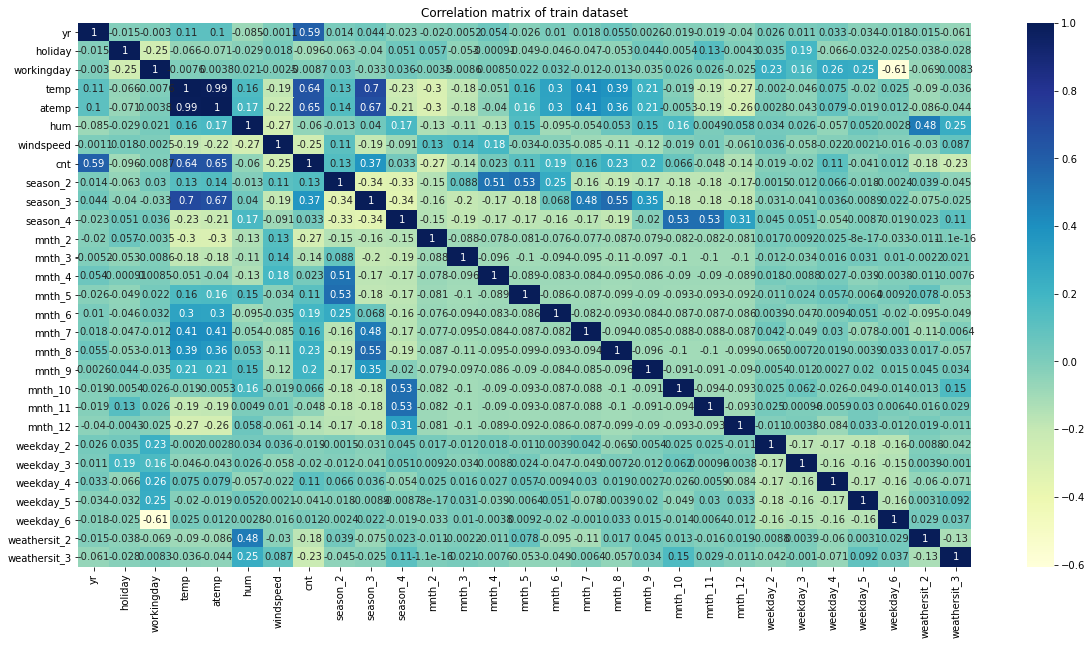

In [67]:
#Checking the correlation matrix in the train dataset

plt.figure(figsize=[20,10])
sns.heatmap(bike_train.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation matrix of train dataset")
plt.show()

In [73]:
bike_train.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr            1.000000 -0.014980   -0.003005  0.107288  0.104206 -0.084792   
holiday      -0.014980  1.000000   -0.254149 -0.066282 -0.070640 -0.029093   
workingday   -0.003005 -0.254149    1.000000 -0.007643  0.003814  0.020701   
temp          0.107288 -0.066282   -0.007643  1.000000  0.989537  0.155415   
atemp         0.104206 -0.070640    0.003814  0.989537  1.000000  0.169461   
hum          -0.084792 -0.029093    0.020701  0.155415  0.169461  1.000000   
windspeed    -0.001108  0.017569   -0.002504 -0.187396 -0.215283 -0.266895   
cnt           0.591508 -0.095961   -0.008723  0.643517  0.646475 -0.059993   
season_2      0.013856 -0.063232    0.030488  0.125582  0.135806 -0.013216   
season_3      0.044102 -0.040017   -0.033210  0.697524  0.669979  0.040371   
season_4     -0.022638  0.050712    0.036097 -0.233697 -0.211118  0.171579   
mnth_2       -0.019916  0.056524   -0.003471 -0.296021 -0.299509 -0.129544   
mnth_3       -0.005172 -0.053321   -0.008563 -0.179694 -0.178458 -0.110761   
mnth_4        0.053776 -0.000907    0.008525 -0.050597 -0.040238 -0.132898   
mnth_5       -0.025933 -0.049076    0.021720  0.155415  0.161923  0.145604   
mnth_6        0.010484 -0.045890    0.032195  0.302997  0.295173 -0.095033   
mnth_7        0.017623 -0.046539   -0.012361  0.413929  0.407105 -0.053838   
mnth_8        0.054774 -0.052728   -0.012875  0.387456  0.360025  0.053185   
mnth_9        0.002574  0.043692   -0.034746  0.207457  0.206157  0.152628   
mnth_10      -0.018790 -0.005387    0.025939 -0.018709 -0.005262  0.162014   
mnth_11      -0.018790  0.127543    0.025939 -0.194765 -0.185697  0.004910   
mnth_12      -0.040049 -0.004302   -0.025020 -0.272869 -0.261862  0.057832   
weekday_2     0.026024  0.034971    0.234321 -0.001951  0.002815  0.033548   
weekday_3     0.010995  0.190636    0.163120 -0.046291 -0.043377  0.026395   
weekday_4     0.032785 -0.066102    0.260091  0.074973  0.078627 -0.056997   
weekday_5    -0.034199 -0.032028    0.252012 -0.019540 -0.018731  0.051908   
weekday_6    -0.017733 -0.025291   -0.605864  0.025276  0.012090  0.002783   
weathersit_2 -0.015469 -0.038279   -0.068924 -0.090161 -0.086069  0.481042   
weathersit_3 -0.060764 -0.028154    0.008289 -0.036093 -0.044266  0.245038   

              windspeed       cnt  season_2  season_3  ...   mnth_10  \
yr            -0.001108  0.591508  0.013856  0.044102  ... -0.018790   
holiday        0.017569 -0.095961 -0.063232 -0.040017  ... -0.005387   
workingday    -0.002504 -0.008723  0.030488 -0.033210  ...  0.025939   
temp          -0.187396  0.643517  0.125582  0.697524  ... -0.018709   
atemp         -0.215283  0.646475  0.135806  0.669979  ... -0.005262   
hum           -0.266895 -0.059993 -0.013216  0.040371  ...  0.162014   
windspeed      1.000000 -0.253794  0.110089 -0.194690  ... -0.018973   
cnt           -0.253794  1.000000  0.134343  0.371606  ...  0.065692   
season_2       0.110089  0.134343  1.000000 -0.340160  ... -0.175089   
season_3      -0.194690  0.371606 -0.340160  1.000000  ... -0.183439   
season_4      -0.090649  0.032636 -0.328116 -0.343764  ...  0.533619   
mnth_2         0.133123 -0.270287 -0.152286 -0.159549  ... -0.082124   
mnth_3         0.142173 -0.137537  0.088068 -0.196818  ... -0.101307   
mnth_4         0.183530  0.022998  0.511984 -0.174156  ... -0.089643   
mnth_5        -0.034137  0.113027  0.532539 -0.181148  ... -0.093241   
mnth_6        -0.035012  0.187821  0.254937  0.068127  ... -0.087187   
mnth_7        -0.085478  0.157812 -0.163963  0.482018  ... -0.088421   
mnth_8        -0.111243  0.227229 -0.185769  0.546121  ... -0.100180   
mnth_9        -0.121734  0.201327 -0.168473  0.347811  ... -0.090853   
mnth_10       -0.018973  0.065692 -0.175089 -0.183439  ...  1.000000   
mnth_11        0.009952 -0.048130 -0.175089 -0.183439  ... -0.094421   
mnth_12       -0.060975 -0.143598 -0.172902 -0.181148  ... -0.093241   
weekday_2      0.035616

In [74]:
#Dropping the atemp column as it is highly correlated with temp

bike_train = bike_train.drop("atemp",axis=1)

In [75]:
bike_test = bike_test.drop("atemp",axis=1)

### Dividing into X and Y sets for the model building

In [79]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### Feature elimination using RFE

In [78]:
#Importing

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [80]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 12),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [82]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [83]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [84]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [85]:
# Adding a constant variable

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [87]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          2.95e-189
Time:                        21:59:05   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2454      0.028      8.776   

In [89]:
#Let's drop the mnth_5 column

X_train_new = X_train_rfe.drop(["mnth_5"], axis = 1)

In [90]:
#Let us check the VIF and then we can eliminate some more features depending on that

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  49.06
7       season_3   6.29
3           temp   3.72
6       season_2   2.65
8       season_4   2.34
4            hum   1.91
10        mnth_8   1.68
13  weathersit_2   1.56
12       mnth_10   1.52
11        mnth_9   1.40
14  weathersit_3   1.26
5      windspeed   1.20
9         mnth_3   1.17
1             yr   1.03
2        holiday   1.02

In [91]:
#Dropping the const variable

X_train_new1 = X_train_new.drop("const",axis=1)

In [93]:
#Let's check the detailed statistics once again

X_train_new1 = sm.add_constant(X_train_new1)

In [94]:
lm = sm.OLS(y_train,X_train_new1).fit()

In [95]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 03 Aug 2021   Prob (F-statistic):          9.02e-190
Time:                        22:18:38   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2400      0.028      8.621   

In [96]:
#Checking VIF again

#Let us check the VIF and then we can eliminate some more features depending on that

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0          const  49.06
7       season_3   6.29
3           temp   3.72
6       season_2   2.65
8       season_4   2.34
4            hum   1.91
10        mnth_8   1.68
13  weathersit_2   1.56
12       mnth_10   1.52
11        mnth_9   1.40
14  weathersit_3   1.26
5      windspeed   1.20
9         mnth_3   1.17
1             yr   1.03
2        holiday   1.02

In [97]:
X_train_new2 = X_train_new1.drop("const",axis=1)

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  24.05
3            hum  15.91
6       season_3   8.53
4      windspeed   4.36
5       season_2   3.51
7       season_4   3.07
12  weathersit_2   2.15
0             yr   2.04
9         mnth_8   1.85
11       mnth_10   1.64
10        mnth_9   1.51
8         mnth_3   1.27
13  weathersit_3   1.19
1        holiday   1.05

In [99]:
X_train_new3 = X_train_new2.drop("temp",axis=1)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2            hum  10.28
3      windspeed   4.28
5       season_3   3.56
6       season_4   2.85
4       season_2   2.07
0             yr   1.98
11  weathersit_2   1.98
8         mnth_8   1.85
10       mnth_10   1.57
9         mnth_9   1.50
7         mnth_3   1.26
12  weathersit_3   1.14
1        holiday   1.05

In [102]:
X_train_new4 = X_train_new3.drop("hum",axis=1)

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2      windspeed  3.14
4       season_3  2.80
5       season_4  2.16
0             yr  1.91
7         mnth_8  1.85
3       season_2  1.65
9        mnth_10  1.57
8         mnth_9  1.49
10  weathersit_2  1.49
6         mnth_3  1.22
11  weathersit_3  1.10
1        holiday  1.04

#### Making Predictions

In [107]:
#Splitting into X_test and y_test

y_test = bike_test.pop("cnt")
X_test = bike_test

In [108]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new4.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [110]:
lm = sm.OLS(y_test,X_test_new).fit()

In [111]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     65.45
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.83e-63
Time:                        03:18:10   Log-Likelihood:                 194.96
No. Observations:                 219   AIC:                            -363.9
Df Residuals:                     206   BIC:                            -319.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2204      0.026      8.617   

#### In both the cases i.e train set and test set, after determinng the R-squared value they came out to be quite close to each other.

R-squared(train-set) = 0.845

R-squared(test-set) = 0.792